# 教師なし学習の例

サンプルデータからワインのデータを使ったクラスタリングの例を紹介します。

### データ

- データの読み込み
- 必要な要素のみを利用

In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

In [2]:
X = wine.data[:, [0, 9]]
X[:10]

array([[14.23,  5.64],
       [13.2 ,  4.38],
       [13.16,  5.68],
       [14.37,  7.8 ],
       [13.24,  4.32],
       [14.2 ,  6.75],
       [14.39,  5.25],
       [14.06,  5.05],
       [14.83,  5.2 ],
       [13.86,  7.22]])

### K-means法でクラスタリング

In [3]:
from sklearn.cluster import KMeans
n_clusters = 3
km = KMeans(n_clusters=n_clusters)

In [4]:
pred = km.fit_predict(X)

### 結果を可視化

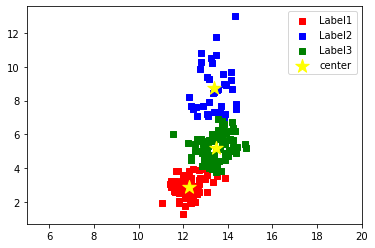

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X[pred==0, 0], X[pred==0, 1], color='red', marker='s', label='Label1')
ax.scatter(X[pred==1, 0], X[pred==1, 1], color='blue', marker='s', label='Label2')
ax.scatter(X[pred==2, 0], X[pred==2, 1], color='green', marker='s', label='Label3')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, color='yellow', marker="*", label="center")
ax.set_xlim([5, 20])
ax.legend()
plt.show()

## Elbow法でクラスタリング数の決定

クラスタ内平方和(Within-Cluster Sum of Squares)を確認し、どれだけの数でクラスタリングするのが良いかを確認する

In [6]:
km.inertia_

203.81937584462636

In [7]:
dist = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    dist.append(km.inertia_)
dist

[1067.9315729004506,
 415.23599496657147,
 203.81937584462636,
 142.2800966687853,
 107.2866570062873,
 91.01212183291834,
 76.04654240305018,
 68.34898205006982,
 58.32281035221751,
 51.235482675132786]

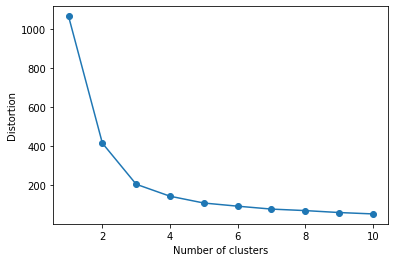

In [8]:
fig, ax = plt.subplots()
ax.plot(range(1, 11), dist, marker="o")
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Distortion')
plt.show()